In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import linestring

In [13]:
zipfile = "tl_2019_us_sdu.shp"
states = gpd.read_file(zipfile)

In [14]:
states.head()

,STATEFP,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GEO_YEAR,SCHOOLYEAR,geometry
0,02,00001,0200001,Lower Kuskokwim School District,00,PK,12,G5420,None,E,5.520808e+10,1.286247e+10,+60.2133219,-163.4349829,2019,2018-2019,"MULTIPOLYGON (((-165.94413 61.28196, -165.9069..."
1,02,00003,0200003,Lower Yukon School District,00,PK,12,G5420,None,E,4.559659e+10,5.841221e+09,+62.2835878,-163.1901714,2019,2018-2019,"POLYGON ((-166.28643 61.60310, -166.27993 61.6..."
2,02,00004,0200004,Yupiit School District,00,KG,12,G5420,None,E,3.391126e+07,9.276006e+06,+60.8956284,-161.4186234,2019,2018-2019,"MULTIPOLYGON (((-160.98419 61.11599, -160.9840..."
3,02,00840,0200840,Yakutat School District,00,PK,12,G5420,None,E,1.974420e+10,3.986129e+09,+60.0174528,-140.4169420,2019,2018-2019,"POLYGON ((-143.89333 59.98598, -143.89333 59.9..."
4,02,00005,0200005,Kashunamiut School District,00,PK,12,G5420,None,E,2.961589e+06,0.000000e+00,+61.5295597,-165.5941259,2019,2018-2019,"POLYGON ((-165.61100 61.52334, -165.61099 61.5..."


In [16]:
! pip install descartes

ImportError: The descartes package is required for plotting polygons in geopandas. You can install it using 'conda install -c conda-forge descartes' or 'pip install descartes'.

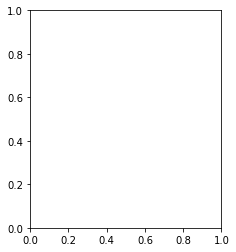

In [21]:
states.plot()